# Least Squares
## Motivation: simple linear regression

The motivation of most sciences is to learn new aspects about real-world phenomena. This is often done by studying how different variables are related to each other. We have already seen how we can use the the correlation coefficient to quantify the relationship between two variables. However, often we would like to understand how a random variable $Y$ depends on some measurement variable (feature) $X$. More concretely, assume that we are interested to study the relationship between weight and height of a person. Here, it is reasonable to assume that weight depends on the height of person. Thus, we can formulate the following model

$$
\begin{equation}
\text{weight} = f(\text{height}).
\end{equation}
$$

It might be that a shorter person implies a lower weight. However, we cannot be certain about this assertion, since we do not know the function $f(\cdot)$. Regression analysis provides us with a powerful framework to address and study problems of this type. The most simple regression model assumes that the functional relationship between the response and explanatory variable is linear, i.e., $f(X) = a + Xb$. (Note, technically this is an afine function, but we simply call it a linear function.) The simple linear regression model can be formulated as

$$
\begin{equation}\label{eq:YfXe}
Y = a + Xb + \varepsilon,
\end{equation}
$$

where $\varepsilon$ denotes the random error introduced by this model (so that the data doesn't lie _perfectly_ on a line).


The regression parameters $a$ and $b$ can be estimated via the method of least squares. Here, we focus on the mechanics for computing the parameters and we are going to ignore the discussion of all the assumptions that are typically made by a statistican.


To gain some intution, we revisit the toy problem that we have already seen before. We consider two variables: $X_1$ is the weight of each of $n=145$ students, and $X_2$ is each student's corresponding height.

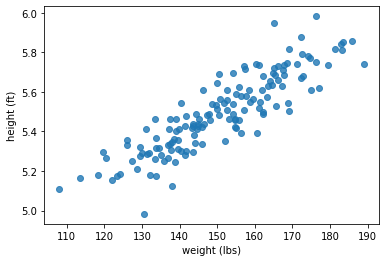

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
%matplotlib inline

np.random.seed(123)
N = 145
x = np.random.standard_normal(size=N)*15 + 150 # weight (lbs)
y = 0.01 * x + np.random.standard_normal(size=145)*0.1 + 4 # height (ft)

plt.scatter(x, y, alpha=0.8)
plt.xlabel("weight (lbs)")
plt.ylabel("height (ft)")
plt.show()

Now, we want to learn a model that provides us with a prediction $\hat{y}$ for a given input $x$


$$
\hat{y} = a + x b.
$$

This model describes a line and a naive approach would be to chose the parameters by hand. If we look at the data, we can make an educated guess by picturing that a line that fits the data has a slope of about $0.01$ and if set $x=0$ the line will intersect the y-axis at about 4.

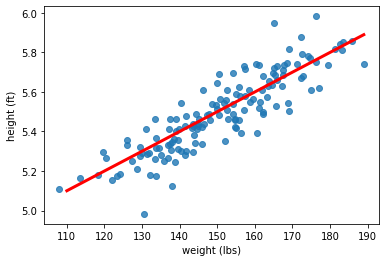

In [2]:
a = 4
b = 0.01

ypred = a + b * np.arange(110,190,1)

plt.plot(np.arange(110,190,1), ypred, c='red',lw=3)
plt.scatter(x, y, alpha=0.8)
plt.xlabel("weight (lbs)")
plt.ylabel("height (ft)")
plt.show()

This looks already like a reasonable model for the data, though we realize that the model is not plausible for data points outside of the observed range (of course, it makes no sense that someone who has zero weight is about 4 feet tall). To quote Box: "All models are wrong, but some are useful". Formulating a "useful" model can be challenging and this is something that you will dicuss in a course on Statistical Modelling.

In the following we want to study a principled way to compute the parameters for a given model (independent of the question whether it is useful or not). A natural starting point to do so is to aim to minimize the distance between the predicted outcome $\hat{y}$ and the actual observed outcome $y$:

$$
\text{minimize} \,\, Q = \sum_i^n (y_i - \hat{y}_i)^2.
$$

Here we use the squared distance, since it doesn't matter whether the distance is positive or negative.

Now, let's plug in our model $\hat{y} = a + x b$ so that we yield

$$Q= \sum_i^b (y_i - (a + x_i b))^2.$$

Next, we can use calculus to find the parameters $a$ and $b$. Specifically, $Q$ will be minimized at the values of $a$ and $b$ for which $\frac{\partial Q}{\partial a}=0$ and $\frac{\partial Q}{\partial b}=0$. We yield the following two conditions:

$$
\begin{align}
& \frac{\partial Q}{\partial a} = \sum_i^n -2 (y_i - a - x_i b) = 2na -2 \sum_i^n y_i + 2b \sum_i^n x_i = 0
\end{align}
$$

and

$$
\begin{align}
& \frac{\partial Q}{\partial b} = \sum_i^n -2 x_i (y_i - a - x_i b) = 2 a \sum_i^n x_i  -2 \sum_i^n x_i y_i + 2b \sum_i^n x_i^2 = 0.
\end{align}
$$

Now, we can first solve the first equation for for $a$

$$
\begin{align}
a = \bar{y} - b \bar{x}.
\end{align}
$$

Then, we can substitue $a$ into the second equation and solve for $b$

$$
\begin{align}
b = \frac{\frac{1}{n} \sum_i^n (x_i - \bar{x})(y_i - \bar{y}) }{\frac{1}{n} \sum_i^n (x_i - \bar{x})^2} = \frac{Cov(x,y)}{Var(x)}
\end{align}
$$

Now, we can compute $a$ and $b$ for our data.

In [3]:
xbar = np.mean(x)
ybar = np.mean(y)
b = np.sum((x-xbar) * (y-ybar)) /  np.sum((x-xbar)**2)
print(b)

a = ybar - b*xbar
print(a)

0.010352211893002648
3.934880810191448


Well, it turns out that our original guess was not too bad. Let's plot the regression line for these estimates.

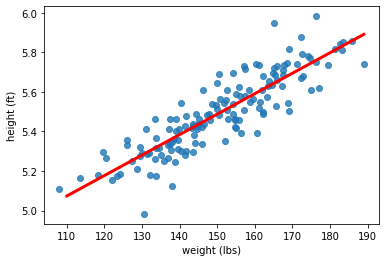

In [4]:
ypred = a + b * np.arange(110,190,1)

plt.plot(np.arange(110,190,1), ypred, c='red',lw=3)
plt.scatter(x, y, alpha=0.8)
plt.xlabel("weight (lbs)")
plt.ylabel("height (ft)")
plt.show()

## Deriving the least squares solution

The above method to compute the parameters $a$ and $b$ isn't very elegant. Fortunately, we can use linear algebra to express the problem more concisely and to obtain the same results. More generally, let's consider fitting a line with $p$ different variables:

$$
y = b_0 + b_1x_1 + \cdots + b_px_p + \varepsilon.
$$

where here $\varepsilon$ is some noise, so that our data doesn't lie _exactly_ on a line.

If we define the vectors $\boldsymbol{b} = \begin{bmatrix}b_0 & b_1 & \dots &b_p\end{bmatrix}^\top$ and $\boldsymbol{x} = \begin{bmatrix}1 & x_1 & \dots & x_p\end{bmatrix}^\top$ , this can be more concisely written as

$$
y = \boldsymbol{b^\top x} + \varepsilon.
$$

(Note: we add the extra $1$ to the $\boldsymbol{x}$ vector so that we can conveniently express the constant term in the linear equation in a dot product.)
Now suppose we have $n$ datapoints $(\boldsymbol{x}_1,y_1), \dots, (\boldsymbol{x}_n,y_n)$ (where remember each $\boldsymbol{x}_i \in \mathbb{R}^{p+1}$) that we want to use to fit the parameters $\boldsymbol{b}$. Let's store our $n$ data samples in an $n\times (p+1)$ matrix:

$$
\boldsymbol{X} = \begin{bmatrix} - &\boldsymbol{x}_1 & - \\ - &\boldsymbol{x}_2 & - \\ &\vdots & \\ - &\boldsymbol{x}_n & -\end{bmatrix} \in \mathbb{R}^{n\times (p+1)}
$$

and all the $y_i$ values in an $n$-dimensional vector:

$$
\boldsymbol{y} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n\end{bmatrix} \in \mathbb{R}^n.
$$

Now our task can be written as finding $\hat{\boldsymbol{b}}$ such that $\boldsymbol{X}\hat{\boldsymbol{b}} \approx \boldsymbol{y}$. We formulize this as the following optimization problem:

$$
\min_\boldsymbol{b} \|\boldsymbol{Xb} - \boldsymbol{y}\|_2^2.
$$

This is called a _least squares_ minimization problem. To solve this minimization problem, we can use a bit of matrix calculus (we didn't cover this, but if you're interested see e.g. https://en.wikipedia.org/wiki/Matrix_calculus -- for the most part, there are basic formulas for the derivatives of most standard vector functions.)

Let's start by expanding $\|\boldsymbol{Xb} - \boldsymbol{y}\|_2^2$:

$$
\begin{align*}
\|\boldsymbol{Xb} - \boldsymbol{y}\|_2^2 &= (\boldsymbol{Xb} - \boldsymbol{y})^\top (\boldsymbol{Xb}-\boldsymbol{y}) \\&= \boldsymbol{b^\top X^\top X b} - \boldsymbol{y^\top Xb} - \boldsymbol{b^\top X^\top y} + \boldsymbol{y^\top y} \\&= \boldsymbol{b^\top X^\top X b} - 2\boldsymbol{y^\top Xb} + \boldsymbol{y^\top y}
\end{align*}
$$

Now if we take the derivative with respect to $b$ and set it equal to zero, we get

$$
\begin{align*}
\nabla_\boldsymbol{b} [\boldsymbol{b^\top X^\top X b} - 2\boldsymbol{b^\top X^\top y} + \boldsymbol{y^\top y}] &= 2\boldsymbol{X^\top X b} - 2\boldsymbol{X^\top y} = 0\\ &\implies \boldsymbol{X^\top X b} = \boldsymbol{X^\top y}
\end{align*}
$$

The linear equations $\boldsymbol{X^\top X b} = \boldsymbol{X^\top y}$ defining the solutions to the least squares problem are called the _normal equations_. Depending on the situation, there are a variety of ways that we might go about solving the normal equations.

**Case 1: $\boldsymbol{X^\top X}$ is full rank, so $\boldsymbol{X^\top X}$ is invertible**

In the simplest case, the matrix $\boldsymbol{X^\top X}$ is full rank, which means that it is invertible. In this case, we can straightforwardly solve the normal equations:

$$
\boldsymbol{X^\top X b} = \boldsymbol{X^\top y} \implies \hat{\boldsymbol{b}} = (\boldsymbol{X^\top X})^{-1}\boldsymbol{X^\top y}.
$$

Then the predicted values are $\hat{\boldsymbol{y}} = \boldsymbol{X}\hat{\boldsymbol{b}} = \boldsymbol{X}(\boldsymbol{X^\top X})^{-1}\boldsymbol{X^\top y}$. The term $\boldsymbol{X}(\boldsymbol{X^\top X})^{-1}\boldsymbol{X^\top y}$ should look familar: it is exactly the projection onto the column space that we have seen before. This makes good sense: if we write $\hat{\boldsymbol{y}} = \boldsymbol{X}\hat{\boldsymbol{b}}$, then we know that by definition $\hat{\boldsymbol{y}}$ is a vector in the column space of $\boldsymbol{X}$ (the span of the columns of $\boldsymbol{X}$), which we'll denote $\text{Col}(\boldsymbol{X})$. Hence we can rewrite the least squares problem as

$$
\min_{\hat{\boldsymbol{y}}\in \text{Col}(\boldsymbol{X})} \|\hat{\boldsymbol{y}} - \boldsymbol{y}\|_2^2.
$$

The solution -- finding the nearest point to $\boldsymbol{y}$ in the subspace $\text{Col}(\boldsymbol{X})$ -- is by definition the projection of of $\boldsymbol{y}$ onto $\text{Col}(\boldsymbol{X])$.

In general, the matrix $\boldsymbol{X^\top X}$ will typically be full rank whenever $p > n$. Let's see a simple example of fitting the linear regression solution in this case. First, we'll generate some fake data: our $\boldsymbol{x}_i$'s are from a normal distribution, and our $y_i$'s are generated as $y_i = \boldsymbol{b}_\star^\top \boldsymbol{x}_i + \varepsilon_i$, where $\boldsymbol{b}_\star$ is some fixed "ground truth" which we're trying to recover.

In [5]:
p = 10
n = 100

X = np.random.normal(size=(n,p+1))
X[:, 0] = np.ones(n) #make the first column all ones

b_star = np.random.normal(size= p+1)
epsilon = .1*np.random.normal(size=n) #noise
y = np.dot(X, b_star) + epsilon

Now we can find the least squares solutionn using $\hat{\boldsymbol{b}} = (\boldsymbol{X^\top X})^{-1}\boldsymbol{X^\top y}$:

In [6]:
b_hat = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))

A simple way to evaluate how good our estimate is is to calculate $\|\hat{\boldsymbol{b}}-\boldsymbol{b}_\star\|_2^2$.

In [7]:
error= np.linalg.norm(b_hat-b_star)**2
print('The error is %s' % error)

The error is 0.0014943894213478


**Case 2: $\boldsymbol{X^\top X}$ is full rank, but $\boldsymbol{X^\top X}$ isn't easily inverted**

One issue that can arise in practice is that while $\boldsymbol{X^\top X}$ is _technically_ full rank, it isn't easy and/or stable to compute the inverse in practice for numerical reasons (for example, this is the case when $\boldsymbol{X^\top X}$ has some very small eigenvalues). One option in this situation is to use the QR decomposition, similar to the way we did in Section 6.3. Recall the QR decomposition writes $\boldsymbol{X} = \boldsymbol{QR}$ where $\boldsymbol{Q}$ is an orthogonal matrix with $\boldsymbol{Q^\top Q} = \boldsymbol{I}$ and $\boldsymbol{R}$ is an upper triangular matrix. Then if we plug $\boldsymbol{X} = \boldsymbol{QR}$ into the normal equations:

$$
\begin{align*}
\boldsymbol{X^\top X b} = \boldsymbol{X^\top y} &\iff (\boldsymbol{QR})^\top \boldsymbol{QR b} = (\boldsymbol{QR})^\top \boldsymbol{y} \\&\iff \boldsymbol{R}^\top \underbrace{\boldsymbol{Q^\top Q}}_{=\boldsymbol{I}} \boldsymbol{R b} = \boldsymbol{R^\top Q^\top y} \\&\iff \boldsymbol{Rb} = \boldsymbol{Q^\top y}
\end{align*}
$$

Now we have reduced the problem to one of the form $\boldsymbol{Rb} = \boldsymbol{y}'$, where $\boldsymbol{R}$ is upper triangular, so we can use the back substitution algorithm to solve it. Let's use this approach to solve a least squares problem. We're going to build an example where $\boldsymbol{X^\top }$ isn't numerically very stable. To do this, we construct construct a $4\times 3$ matrix whose third column is a small purturbation of the sum of the first two columns. Then we generate $\boldsymbol{y} = \boldsymbol{Xb}_\star + \boldsymbol{\varepsilon}$.

In [8]:
np.random.seed(0)
p = 3
n = 4

x1 = np.random.normal(size=n)
x2 = np.random.normal(size=n)
x3 = x1 + x2 + 0.00001*np.random.normal(size=n)

X = np.stack([x1,x2,x3], axis=1)
b_star = np.random.normal(size=p)
y = np.dot(X, b_star) + 0.1*np.random.normal(size=n)

Now let's start by computing a QR decomposition of $\boldsymbol{X}$.

In [9]:
Q,R = np.linalg.qr(X)

Next, we use `scipy.linalg.solve_triangular` to perform back substution and solve for $\hat{\boldsymbol{b}}_{qr}$.

In [10]:
import scipy

b_hat_qr = scipy.linalg.solve_triangular(R, np.dot(Q.T, y))

Let's check that this actually gave us a good solution to the normal equations by computing $\|\boldsymbol{X^\top X}\hat{\boldsymbol{b}}_{qr} - \boldsymbol{X^\top y}\|_2$.

In [11]:
inversion_error_qr = np.linalg.norm(np.dot(X.T,np.dot(X, b_hat_qr))-np.dot(X.T,y))
inversion_error_qr

3.728207101820981e-10

This is a pretty small error $\approx 4.4 \times 10^{-10}$. Now let's check that the usual method via inverting $\boldsymbol{X^\top X}$ does not do as well on this problem.

In [12]:
b_hat_ls = np.dot(np.linalg.inv(np.dot(X.T,X)), np.dot(X.T, y))
inversion_error_ls = np.linalg.norm(np.dot(X.T,np.dot(X, b_hat_ls))-np.dot(X.T,y))
inversion_error_ls

0.0019009385213144508

The error now is much larger -- almost $8$ orders of magnitude larger than the QR method.

A second approach that one might use in the situation when $\boldsymbol{X^\top X}$ isn't invertible numerically is to use the so-called _ridge regression_ solution. This solves a slightly different problem than the basic least squares problem, and gives us a solution of the form

$$
\hat{\boldsymbol{b}} = (\boldsymbol{X^\top X} + \lambda \boldsymbol{I})^{-1}\boldsymbol{X^\top y}
$$

where $\lambda$ is some parameter that we choose (and when $\lambda =0$ we get the original least squares solution back). This is convenient since often in practice adding a small multiple of the identity matrix to $\boldsymbol{X^\top X}$ suffices to make $\boldsymbol{X^\top X} + \lambda \boldsymbol{I}$ more stable numerically (it essentially amounts to adding $\lambda$ to all of the eigenvalues of $\boldsymbol{X^\top X}$). Ridge regression also has many nice statistical properties, but for the sake of this class we won't discuss this aspect.

**Case 3: $X^\top X$ is not full rank**

Another situation that can arise, particularly when $n< p$, is that $\boldsymbol{X^\top X}$ is not full rank, and therefore not invertible at all. Intuitively this is becuase the equations

$$
\boldsymbol{Xb} = \boldsymbol{y}
$$

have _many_ possible solutions, being a system of $n$ equations with $p+1$ unknowns. One approach in this scenario is to consider the ridge regression solution mentioned above, however here we will describe a different approach.

Any solution $\boldsymbol{b}$ to this system will be of the form $\hat{\boldsymbol{b}} = \boldsymbol{X}^\dagger \boldsymbol{y}$ where $\boldsymbol{X}^\dagger$ is a right inverse of $\boldsymbol{X}$ satisfying

$$
\boldsymbol{X}\boldsymbol{X}^\dagger = \boldsymbol{I}
$$

since then

$$
\boldsymbol{X}\hat{\boldsymbol{b}} = \boldsymbol{XX}^\dagger \boldsymbol{y} = \boldsymbol{y}.
$$

 Provided the matrix $\boldsymbol{XX}^\top$ is invertible, one common choice for a right inverse to use is the Moore-Penrose pseudo-inverse, which is given by

$$
\boldsymbol{X}^\dagger = \boldsymbol{X^\top} (\boldsymbol{XX}^\top)^{-1}.
$$

Note this is clearly a right inverse, since $\boldsymbol{XX}^\dagger = \boldsymbol{XX^\top} (\boldsymbol{XX}^\top)^{-1} = \boldsymbol{I}$.

**Remark.** The pseudo-inverse can actually be defined even when $\boldsymbol{XX}^\top$ is not invertible: if $\boldsymbol{X} = \boldsymbol{U\Sigma V}^\top$ is the SVD of $\boldsymbol{X}$, then the pseudo-inverse is $\boldsymbol{X}^\dagger = \boldsymbol{V}\boldsymbol{\Sigma}^\dagger \boldsymbol{U}^\top$ where we define $\boldsymbol{\Sigma}^\dagger$ by taking the reciprocal of all the non-zero elements of $\boldsymbol{\Sigma}$. 

Using the pseudo-inverse we can define the so-called least-norm solution $\hat{\boldsymbol{b}} = \boldsymbol{X}^\dagger \boldsymbol{y}$. It is called the least-norm solution because it satisfies the following property:

$$
\hat{\boldsymbol{b}} = \text{argmin}_{\boldsymbol{b}: \boldsymbol{Xb} =\boldsymbol{y}} \|\boldsymbol{b}\|.
$$

That is, among all vectors $\boldsymbol{b}$ satisfying $\boldsymbol{Xb} = \boldsymbol{y}$, the solution $\hat{\boldsymbol{b}} = \boldsymbol{X}^\dagger \boldsymbol{y}$ has the smallest norm.

The pseudo inverse of a matrix $\boldsymbol{X}$ can be computed in Python using `np.linalg.pinv()`. Let's see an example.

In [13]:
p = 10
n = 5

X = np.random.normal(size=(n,p+1))
X[:, 0] = np.ones(n) #make the first column all ones

b_star = np.random.normal(size=p+1)

epsilon = .1*np.random.normal(size=n) #noise
y = np.dot(X, b_star) + epsilon

Now let's find $\hat{\boldsymbol{b}} = \boldsymbol{X}^\dagger \boldsymbol{y}$.

In [14]:
b_hat = np.dot(np.linalg.pinv(X),y)

Again, we can check how close $\hat{\boldsymbol{b}}$ is to $\boldsymbol{b}_\star$:

In [15]:
error = np.linalg.norm(b_hat - b_star)**2
print('The error is %s' % error)

The error is 7.475752172015447


## Nonlinear curve fitting with least squares

Based on our above discussions, one might be tempted to think that the least squares method can only be used to fit lines to data. However, this is certainly not the case. For example, let's consider fitting models of the form

$$
y = f(\boldsymbol{x}) = b_0 + b_1 \phi_1(\boldsymbol{x}) + b_2 \phi_2(\boldsymbol{x}) + \cdots + b_p\phi_p(\boldsymbol{x}) + \varepsilon.
$$

Here $\phi_1,\dots,\phi_p$ can be _any_ non-linear functions. Given $n$ samples $(\boldsymbol{x}_1,y_1),\dots,(\boldsymbol{x}_n,y_n)$, let's define the matrix

$$
\boldsymbol{\Phi} = \begin{bmatrix} 1 & \phi_1(\boldsymbol{x}_1) & \cdots & \phi_p(\boldsymbol{x}_1)\\ 1 & \phi_1(\boldsymbol{x}_2) & \cdots & \phi_p(\boldsymbol{x}_2)\\ \vdots & \cdots & \cdots & \vdots\\ 1 & \phi_1(\boldsymbol{x}_n) & \cdots & \phi_p(\boldsymbol{x}_n)\end{bmatrix}
$$

and again $\boldsymbol{b} = \begin{bmatrix}b_0 & b_1 & \dots & b_p\end{bmatrix}^\top$ and $\boldsymbol{y} = \begin{bmatrix}y_1 & \dots & y_n\end{bmatrix}^\top$. Then we can formulate our problem as

$$
\boldsymbol{y} = \boldsymbol{\Phi b} + \boldsymbol{\varepsilon}
$$

and again we can use the least squares method to find $\hat{\boldsymbol{b}}$ such that $\boldsymbol{\Phi} \hat{\boldsymbol{b}} \approx  \boldsymbol{y}$. For example, if $\boldsymbol{\Phi^\top \Phi}$ is invertible, we could obtain the solution $\hat{\boldsymbol{b}} = (\boldsymbol{\Phi^\top \Phi})^{-1}\boldsymbol{\Phi^\top y}$.

A common example of the nonlinear functions $\phi_j$ that we could use are the polynomials $\phi_j(x) = x^j$.

**Remark:** As we have seen above, the term "linear regression" is somewhat misleading in describing the types of models that we can fit using least squares. The models that we fit do not need to be linear in the data $\boldsymbol{x}$, but rather linear in the _parameters_ $\boldsymbol{b}$.

Let's see a simple example. First, let's generate some data.

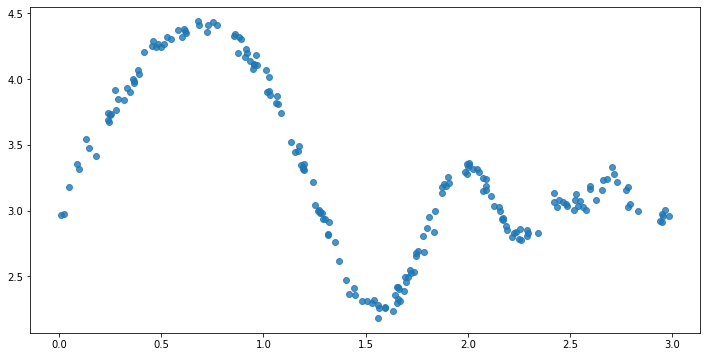

In [16]:
np.random.seed(123)
n = 200
x = np.random.uniform(low=0, high=3, size=n)
y = 3 + (np.sin(3 * x) + 2 * np.sin(2 * x**2) + np.sin(x**3)) / np.exp(x) + np.random.standard_normal(n)*0.05

fig = plt.figure(figsize=(12,6))
plt.scatter(x, y, alpha=0.8)
plt.show()

Now let's write a function to compute the polynomials $\phi_j(x) = x^j$. We also define a simple helper function to compute the least squares $\hat{\boldsymbol{b}}$ (note the numpy `pinv` function conveniently computes either $\hat{\boldsymbol{b}} = \boldsymbol{X]^\top (\boldsymbol{XX}^\top)^{-1}\boldsymbol{y}$ or $\hat{\boldsymbol{b}} = (\boldsymbol{X^\top X})^{-1}\boldsymbol{X^\top y}$ depending on whether $\boldsymbol{X^\top X}$ or $\boldsymbol{XX}^\top$ is invertible).

In [17]:
def polynomial_features(x,p):
    n = len(x)
    Phi = np.empty(shape=(n,p+1))
    for j in np.arange(p+1):
        Phi[:,j] = x**j
    return Phi

def fit_least_squares(Phi,y):
    return np.dot(np.linalg.pinv(Phi),y)

First, let's try fitting a simple first order polynomial to this data.

In [18]:
Phi1 = polynomial_features(x,1)
b_hat1 = fit_least_squares(Phi1,y)

Now let's visualize how well this model actually fits our data.

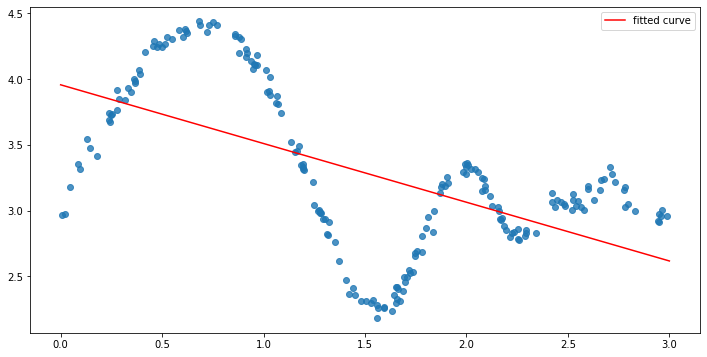

In [19]:
x_test = np.arange(0,3.01,.01)
Phi_test1 = polynomial_features(x_test,1)
y_test1 = np.dot(Phi_test1, b_hat1)

fig = plt.figure(figsize=(12,6))
plt.scatter(x, y, alpha=0.8)
plt.plot(x_test, y_test1, color='red', label='fitted curve')
plt.legend()
plt.show()

As expected, this doesn't do very well, since we tried to fit a line to clearly non-linear data. Now let's try a higher order polynomial, say with $p=8$.

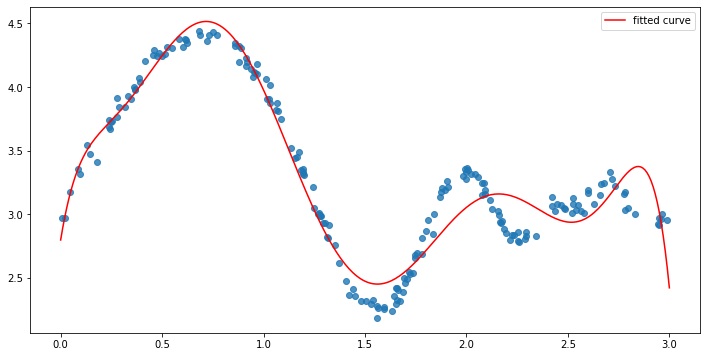

In [20]:
Phi8 = polynomial_features(x,8)
b_hat8 = fit_least_squares(Phi8,y)

Phi_test8 = polynomial_features(x_test,8)
y_test8 = np.dot(Phi_test8, b_hat8)

fig = plt.figure(figsize=(12,6))
plt.scatter(x, y, alpha=0.8)
plt.plot(x_test, y_test8, color='red', label='fitted curve')
plt.legend()
plt.show()

This seems to do a better job of capturing the non-linear behavior of the data, but perhaps we can do even better by fitting even more polynomial terms.

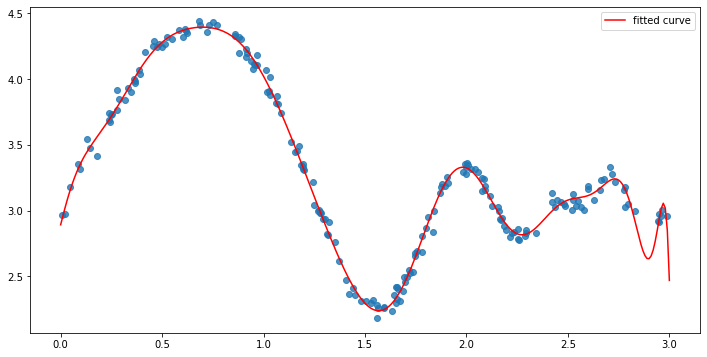

In [21]:
Phi20 = polynomial_features(x,20)
b_hat20 = fit_least_squares(Phi20,y)

Phi_test20 = polynomial_features(x_test,20)
y_test20 = np.dot(Phi_test20, b_hat20)

fig = plt.figure(figsize=(12,6))
plt.scatter(x, y, alpha=0.8)
plt.plot(x_test, y_test20, color='red', label='fitted curve')
plt.legend()
plt.show()

This does a better job it seems. In practice, one can try many values of $p$ and use a hold-out test set to determine the best value of $p$. This is a topic that you may see later in a statistical machine learning course.